## Data for data filling test produced using this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from solardatatools.matrix_embedding import make_2d
from solardatatools.data_filling import zero_nighttime, interp_missing
from solardatatools.plotting import plot_2d
from solardatatools.dataio import get_pvdaq_data
import pandas as pd

In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

CAUTION: Multiple scan rates detected!=======================] 100.0% ...queries complete in 23.1 seconds       
Scan rates (in seconds): [300, 280]
0 transitions detected.
Suggest splitting data set between:




### Select I/O file names

In [3]:
zero_nighttime_input_file_name = "pvdaq_2d_data_input.csv"
zero_nighttime_output_file_name = "expected_zero_nighttime_output.csv"
interp_missing_output_file_name = "expected_interp_missing_output.csv"

### Create input data

In [4]:
data = make_2d(df1, key='dc_power', trim_start=True, trim_end=True)

### Save input data to csv

In [5]:
np.savetxt('./' + zero_nighttime_input_file_name, data, delimiter=",")

In [6]:
data_file_path = "./" + zero_nighttime_input_file_name
with open(data_file_path) as file:
    input_data = np.genfromtxt(data_file_path, delimiter=',')

### Run functions

In [7]:
z = zero_nighttime(input_data)
i = interp_missing(z)

### Save expected output for zero_nighttime() to csv

In [8]:
np.savetxt('./' + zero_nighttime_output_file_name, z, delimiter=',')

### Save expected output for interp_missing() to csv

In [9]:
np.savetxt('./' + interp_missing_output_file_name, i, delimiter=',')

### Visual Test

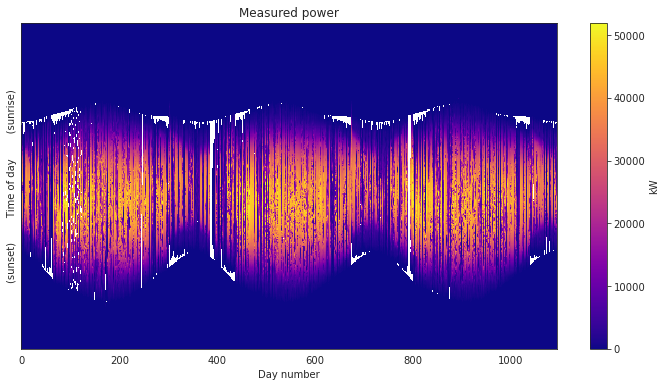

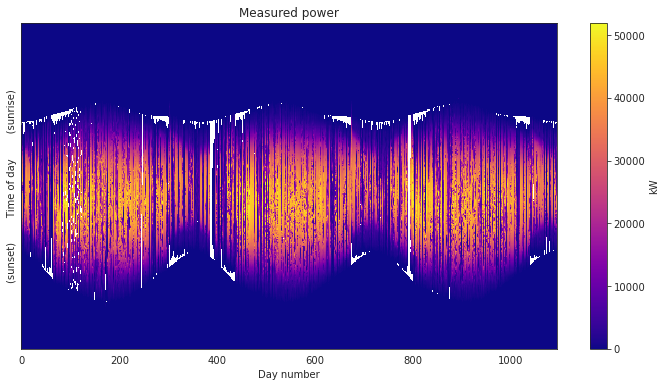

In [10]:
plot_2d(z)

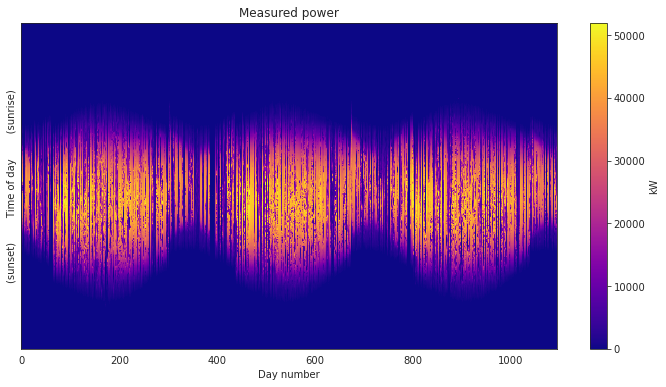

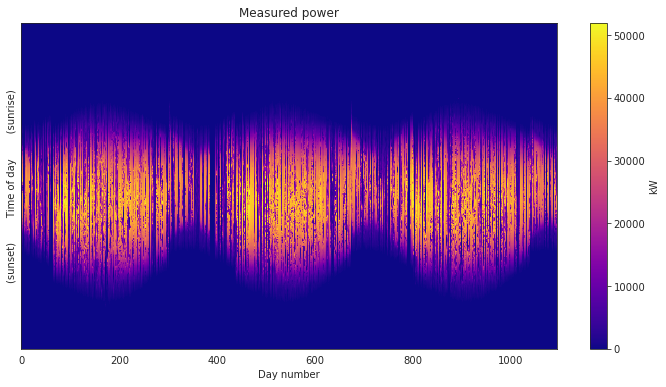

In [11]:
plot_2d(i)